

## Introduction

Welcome to the **Credit Card Fraud Detection Repository**! In this project, we focus on identifying fraudulent credit card transactions using a combination of statistical techniques and machine learning. Our goal is to build a robust system that can automatically detect suspicious activities and protect users from financial losses.

### Key Components

1. **Data Preprocessing:**
   - We start by cleaning and preparing the credit card transaction data. This involves handling missing values, standardizing features, and exploring the dataset.
   - Boxplots and Z-scores play a crucial role in identifying outliers. Outliers are potential anomalies that might indicate fraudulent transactions.

2. **Outlier Detection:**
   - We leverage boxplots and Z-scores to pinpoint outliers in the transaction data. Outliers could be transactions with unusually high or low amounts, abnormal frequency, or suspicious patterns.
   - Removing outliers helps improve the accuracy of our fraud detection model.

3. **Classification Model: Decision Tree**
   - Decision trees are powerful tools for binary classification tasks. We'll train a decision tree model to classify transactions as either legitimate or fraudulent.
   - The decision tree algorithm splits the data based on features such as transaction amount, merchant category, and time of day.

### How to Use This Repository

1. **Download the Dataset:**
   - You can download the credit card fraud dataset from this link: [Credit Card Fraud Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).
   - Make sure to explore the dataset and understand its structure.

2. **Run the Notebooks:**
   - The heart of this repository lies in the Jupyter notebooks. Start by opening the `Outlier Detection in Imbalanced Fraud Detection.ipynb` file.
   - Follow the step-by-step instructions to preprocess the data, detect outliers, and build the decision tree model.
   - Feel free to experiment with different hyperparameters and feature engineering techniques.

3. **Contribute and Collaborate:**
   - Have ideas for improving fraud detection? Found a better approach? We encourage contributions!
   - Submit pull requests, share your insights, and let's collectively enhance our defenses against credit card fraud.


### Source

(1) credit-card-fraud-detection · GitHub Topics · GitHub. https://github.com/topics/credit-card-fraud-detection.

(2) Analysis of Credit Cards Fraud Detection: Process and Techniques .... https://link.springer.com/chapter/10.1007/978-3-031-39158-3_84.

(3) Review of Machine Learning Approach on Credit Card Fraud Detection .... https://link.springer.com/article/10.1007/s44230-022-00004-0.

# Load Credit Card Dataset

In [ ]:
# Import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, confusion_matrix
from scipy import stats
from sklearn.tree import DecisionTreeClassifier


In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()
df.drop(['Time','Amount'], axis=1, inplace=True)
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'],
      dtype='object')

In [ ]:
# Assuming your dataframe is called df
features = df.iloc[:, :-1] # Select columns V1 to V28
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


In [ ]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


# Outlier Detection

Let's break down this Section:

1. **Data Splitting:**
   - The original dataset has been divied into two subsets: `normal_df` (for legitimate transactions) and `fraud_df` (for fraudulent transactions).


2. **Box Plots for Outlier Removal:**
   - You've split the dataset into `normal_df` (legitimate transactions) and `fraud_df` (fraudulent transactions).
   - For each feature, you calculate the first and third quartiles (Q1 and Q3) separately for both classes.
   - The interquartile range (IQR) is then computed for each class: `IQR = Q3 - Q1`.
   - Based on the IQR, you define lower and upper bounds for outliers: `lower_bound = Q1 - 1.5 * IQR` and `upper_bound = Q3 + 1.5 * IQR`.
   - Transactions outside these bounds are considered outliers and are filtered out from both dataframes.
   - Finally, you concatenate the cleaned normal and fraud dataframes into `new_df_no_outliers_boxplots`.

3. **Z-Scores for Outlier Removal:**
   - In this method, you calculate the z-scores for each feature within both classes.
   - The z-score represents how many standard deviations a data point is from the mean.
   - You define a threshold (typically 3) beyond which data points are considered outliers.
   - Transactions with z-scores greater than the threshold (or less than its negative) are filtered out.
   - The cleaned dataframes are concatenated into `new_df_no_outliers_zscores`.

4. **Concatenation:**
   - Finally, we concatenate the cleaned normal and fraud dataframes into a new dataframe called `new_df_no_outliers_boxplots`and `new_df_no_outliers_zscores`.

This approach ensures that your model won't be influenced by extreme values, which is crucial for accurate fraud detection. Remember to document our process thoroughly in your repository so that others can understand and reproduce our work.


In [ ]:
# Split the dataframe into normal and fraud classes
normal_df = df[df["Class"] == 0]
fraud_df = df[df["Class"] == 1]

# Method 1: Box plots
# Create copies of the normal and fraud dataframes
normal_df_no_outliers = normal_df.copy()
fraud_df_no_outliers = fraud_df.copy()

# Loop through the features and remove the outliers using box plots
for feature in features:
    # Calculate the first and third quartiles of the feature for normal class
    Q1_normal = normal_df_no_outliers[feature].quantile(0.25)
    Q3_normal = normal_df_no_outliers[feature].quantile(0.75)

    # Calculate the interquartile range (IQR) for normal class
    IQR_normal = Q3_normal - Q1_normal

    # Define the lower and upper bounds for outliers for normal class
    lower_bound_normal = Q1_normal - 1.5 * IQR_normal
    upper_bound_normal = Q3_normal + 1.5 * IQR_normal

    # Filter out the outliers from the normal dataframe
    normal_df_no_outliers = normal_df_no_outliers[(normal_df_no_outliers[feature] >= lower_bound_normal) & (normal_df_no_outliers[feature] <= upper_bound_normal)]

    # Calculate the first and third quartiles of the feature for fraud class
    Q1_fraud = fraud_df_no_outliers[feature].quantile(0.25)
    Q3_fraud = fraud_df_no_outliers[feature].quantile(0.75)

    # Calculate the interquartile range (IQR) for fraud class
    IQR_fraud = Q3_fraud - Q1_fraud

    # Define the lower and upper bounds for outliers for fraud class
    lower_bound_fraud = Q1_fraud - 1.5 * IQR_fraud
    upper_bound_fraud = Q3_fraud + 1.5 * IQR_fraud

    # Filter out the outliers from the fraud dataframe
    fraud_df_no_outliers = fraud_df_no_outliers[(fraud_df_no_outliers[feature] >= lower_bound_fraud) & (fraud_df_no_outliers[feature] <= upper_bound_fraud)]


# Concatenate the normal and fraud dataframes after outlier removal using box plots
new_df_no_outliers_boxplots = pd.concat([normal_df_no_outliers, fraud_df_no_outliers], ignore_index=True)

# Save the concatenated dataframe after outlier removal using box plots
new_df_no_outliers_boxplots.to_csv("new_df_no_outliers_boxplots1.csv", index=False)


# Method 2: Z-scores
# Create copies of the normal and fraud dataframes
normal_df_no_outliers = normal_df.copy()
fraud_df_no_outliers = fraud_df.copy()

# Loop through the features and remove the outliers using z-scores
for feature in features:
    # Calculate the z-scores of the feature for normal class
    z_scores_normal = stats.zscore(normal_df_no_outliers[feature])

    # Define the threshold for outliers for normal class
    threshold_normal = 3

    # Filter out the outliers from the normal dataframe
    normal_df_no_outliers = normal_df_no_outliers[(z_scores_normal < threshold_normal) & (z_scores_normal > -threshold_normal)]

    # Calculate the z-scores of the feature for fraud class
    z_scores_fraud = stats.zscore(fraud_df_no_outliers[feature])

    # Define the threshold for outliers for fraud class
    threshold_fraud = 3

    # Filter out the outliers from the fraud dataframe
    fraud_df_no_outliers = fraud_df_no_outliers[(z_scores_fraud < threshold_fraud) & (z_scores_fraud > -threshold_fraud)]


# Concatenate the normal and fraud dataframes after outlier removal using box plots
new_df_no_outliers_zscores = pd.concat([normal_df_no_outliers, fraud_df_no_outliers], ignore_index=True)

# Save the concatenated dataframe after outlier removal using box plots
new_df_no_outliers_zscores.to_csv("new_df_no_outliers_zscores1.csv", index=False)

In [ ]:
new_df_no_outliers_boxplots

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0
3,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0
4,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120718,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1
120719,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1
120720,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1
120721,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1


In [ ]:
new_df_no_outliers_zscores

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
3,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
4,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213494,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1
213495,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1
213496,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1
213497,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1


# Class Distribution: Original Data vs. Cleaned Data
Thank you for sharing the code snippet! It's great to see how you're visualizing the class distribution in your credit card fraud detection dataset. Let's break down what you've done:

1. **Function `plot_class_count(df)`**:
   - This function takes a dataframe (`df`) as input.
   - It counts the number of transactions for each class (0 for non-fraud and 1 for fraud).
   - The bar chart is plotted with green bars representing non-fraud transactions and red bars representing fraud transactions.
   - The x-axis labels are set to indicate the class names.
   - Numbers of samples are annotated above the bars for clarity.

2. **Visualization**:
   - You've called this function three times:
     - First, for the original dataset (`df`).
     - Second, for the cleaned dataset after outlier removal using box plots (`new_df_no_outliers_boxplots`).
     - Third, for the cleaned dataset after outlier removal using Z-scores (`new_df_no_outliers_zscores`).
   - By comparing these visualizations, you can observe how the removal of outliers affects the class distribution.

Remember to include this visualization in your repository documentation. It provides valuable insights into the data preprocessing steps you've taken. Keep up the excellent work, and happy coding! 📊🚀🔍

In [ ]:
# Define the function
def plot_class_count(df):
  # Count the number of transactions for each class
  cnt_pro = df['Class'].value_counts()
  # Set the figure size
  fig = plt.figure(figsize=(8,6))
  # Plot the bar chart with green and red colors
  barplot = sns.barplot(x=cnt_pro.index, y=cnt_pro.values, palette=['green', 'red'])
  # Set the y-axis label and font size
  plt.ylabel('Number of Transactions', fontsize=12)
  # Set the x-axis label and font size
  plt.xlabel('target', fontsize=12)

  # Set x-tick labels
  barplot.set_xticklabels([' 0 = non-fraud transactions' , ' 1 = fraud transactions'])

  # Add the numbers of samples above the bars
  for p in barplot.patches:
    # Get the height and position of each bar
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    # Annotate the number with some offset
    barplot.annotate(f'{height:.0f}', (x, height + 100), ha='center', va='bottom')

  fig.show()
  # Return the figure object

C:\Users\MohammadAli\AppData\Local\Temp\ipykernel_16600\2187224763.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


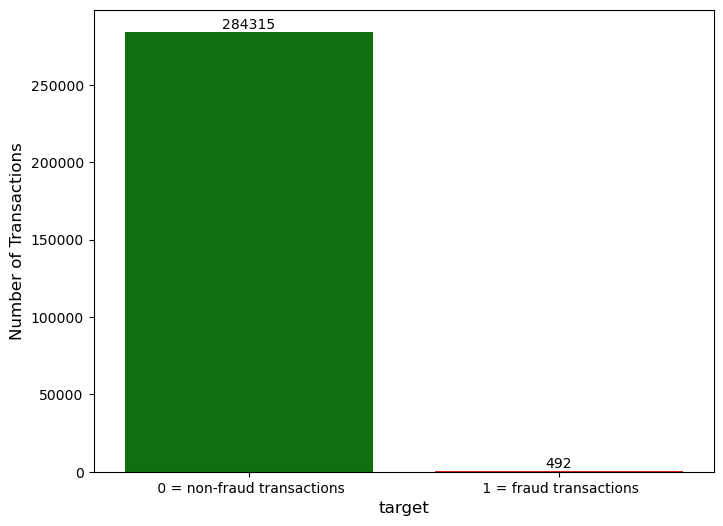

In [ ]:
plot_class_count(df)


C:\Users\MohammadAli\AppData\Local\Temp\ipykernel_16600\2187224763.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


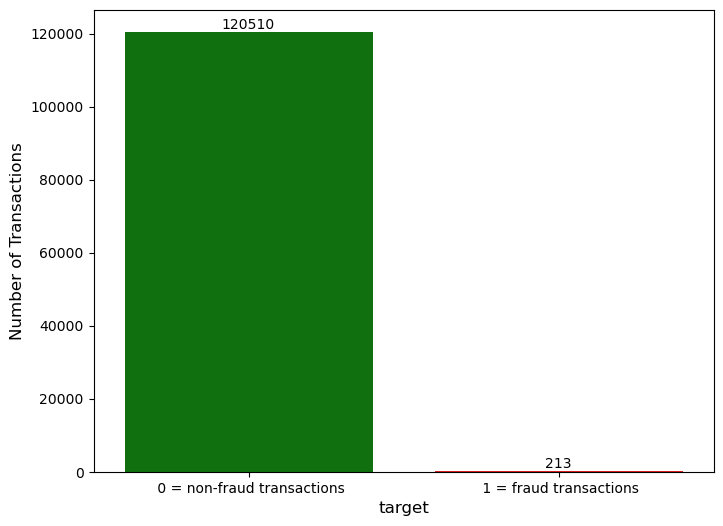

In [ ]:
plot_class_count(new_df_no_outliers_boxplots)


C:\Users\MohammadAli\AppData\Local\Temp\ipykernel_16600\2187224763.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


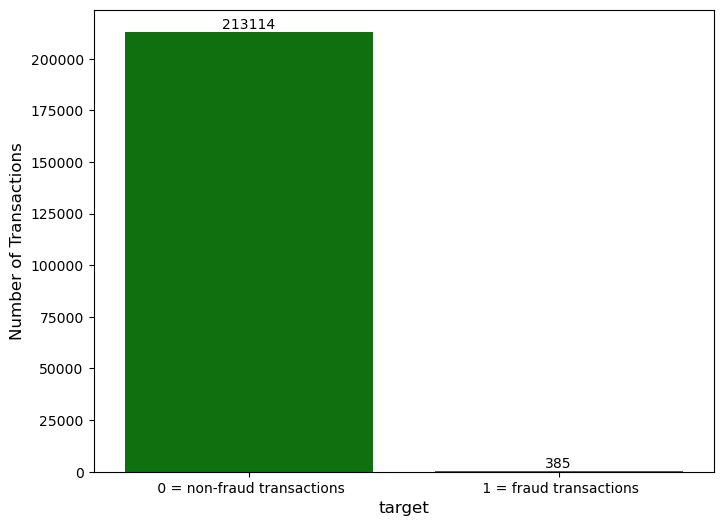

In [ ]:
plot_class_count(new_df_no_outliers_zscores)




## Data Splitting: Train and Test Sets

In this section, we split the credit card fraud detection dataset into train and test sets. The goal is to prepare the data for model training and evaluation. Here's what we do:

1. **Percentage of Frauds:**
   - We print the percentage of frauds and non-frauds in the entire dataset.

2. **Feature Separation:**
   - We separate the features (X) and the target variable (y) from the dataset.

3. **Train-Test Split:**
   - We split the data into an 80% train set and a 20% test set.
   - The random state is set for reproducibility.

4. **Shape and Class Distribution:**
   - We print the shape of the train and test sets.
   - We also show the number of frauds and non-frauds in each set.



In [ ]:
# Import the library
from sklearn.model_selection import train_test_split

# Define the function
def split_data(df):
  # Print the percentage of frauds and non-frauds in the dataset
  print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
  print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

  # Separate the features and the target variable
  X = df.drop('Class', axis=1)
  y = df['Class']

  # Split the data into 80% train and 20% test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

  # Print the shape of the train and test sets
  print('X train shape = ', X_train.shape)
  print('X test shape = ', X_test.shape)
  print('y train shape = ', y_train.shape)
  print('y test shape = ', y_test.shape)

  # Print the number of frauds and non-frauds in the train and test sets
  train_counts = y_train.value_counts()
  print(train_counts)
  test_counts = y_test.value_counts()
  print(test_counts)

  # Return the train and test sets
  return X_train, X_test, y_train, y_test



In [ ]:
X_train, X_test, y_train, y_test = split_data(df)

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
X train shape =  (227845, 28)
X test shape =  (56962, 28)
y train shape =  (227845,)
y test shape =  (56962,)
Class
0    227454
1       391
Name: count, dtype: int64
Class
0    56861
1      101
Name: count, dtype: int64


In [ ]:
X_train_b, X_test_b, y_train_b, y_test_b = split_data(new_df_no_outliers_boxplots)

No Frauds 99.82 % of the dataset
Frauds 0.18 % of the dataset
X train shape =  (96578, 28)
X test shape =  (24145, 28)
y train shape =  (96578,)
y test shape =  (24145,)
Class
0    96414
1      164
Name: count, dtype: int64
Class
0    24096
1       49
Name: count, dtype: int64


In [ ]:
X_train_z, X_test_z, y_train_z, y_test_z = split_data(new_df_no_outliers_zscores)

No Frauds 99.82 % of the dataset
Frauds 0.18 % of the dataset
X train shape =  (170799, 28)
X test shape =  (42700, 28)
y train shape =  (170799,)
y test shape =  (42700,)
Class
0    170489
1       310
Name: count, dtype: int64
Class
0    42625
1       75
Name: count, dtype: int64




## Feature Visualization: Box Plots

In this section, we visualize the distribution of features (V1 to V28) in the credit card fraud detection dataset. Specifically, we compare the distribution of each feature between legitimate transactions (Class 0) and fraudulent transactions (Class 1). Here's what we do:

1. **Box Plots:**
   - We create a 4x7 grid of subplots, with each subplot representing a feature.
   - For each feature (V1 to V28), we plot a boxplot showing its distribution for both classes (fraud vs. non-fraud).
   - The green boxes represent non-fraud transactions, and the red boxes represent fraud transactions.
   - The title of each subplot indicates the feature name (e.g., "V1 vs Class").

2. **Observations:**
   - By comparing the boxplots, we can identify features that exhibit significant differences between the two classes.
   - Outliers or extreme values in certain features may be indicative of fraudulent behavior.


In [ ]:
def plot_features(df):
  # Create a figure with 4 rows and 7 columns of subplots
  fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(20,30))
  # Flatten the axes array to make it easier to loop over
  axes = axes.flatten()
  # Loop over the features from V1 to V28
  for i in range(1,29):
    # Get the feature name
    feature = "V" + str(i)
    # Plot a boxplot of the feature vs the class
    sns.boxplot(x="Class", y=feature, data=df, palette=['green', 'red'], ax=axes[i-1])
    # Set the title of the subplot
    axes[i-1].set_title(feature + " vs Class")
  # Adjust the layout to avoid overlapping labels
  plt.tight_layout()
  # Show the plot
  plt.show()


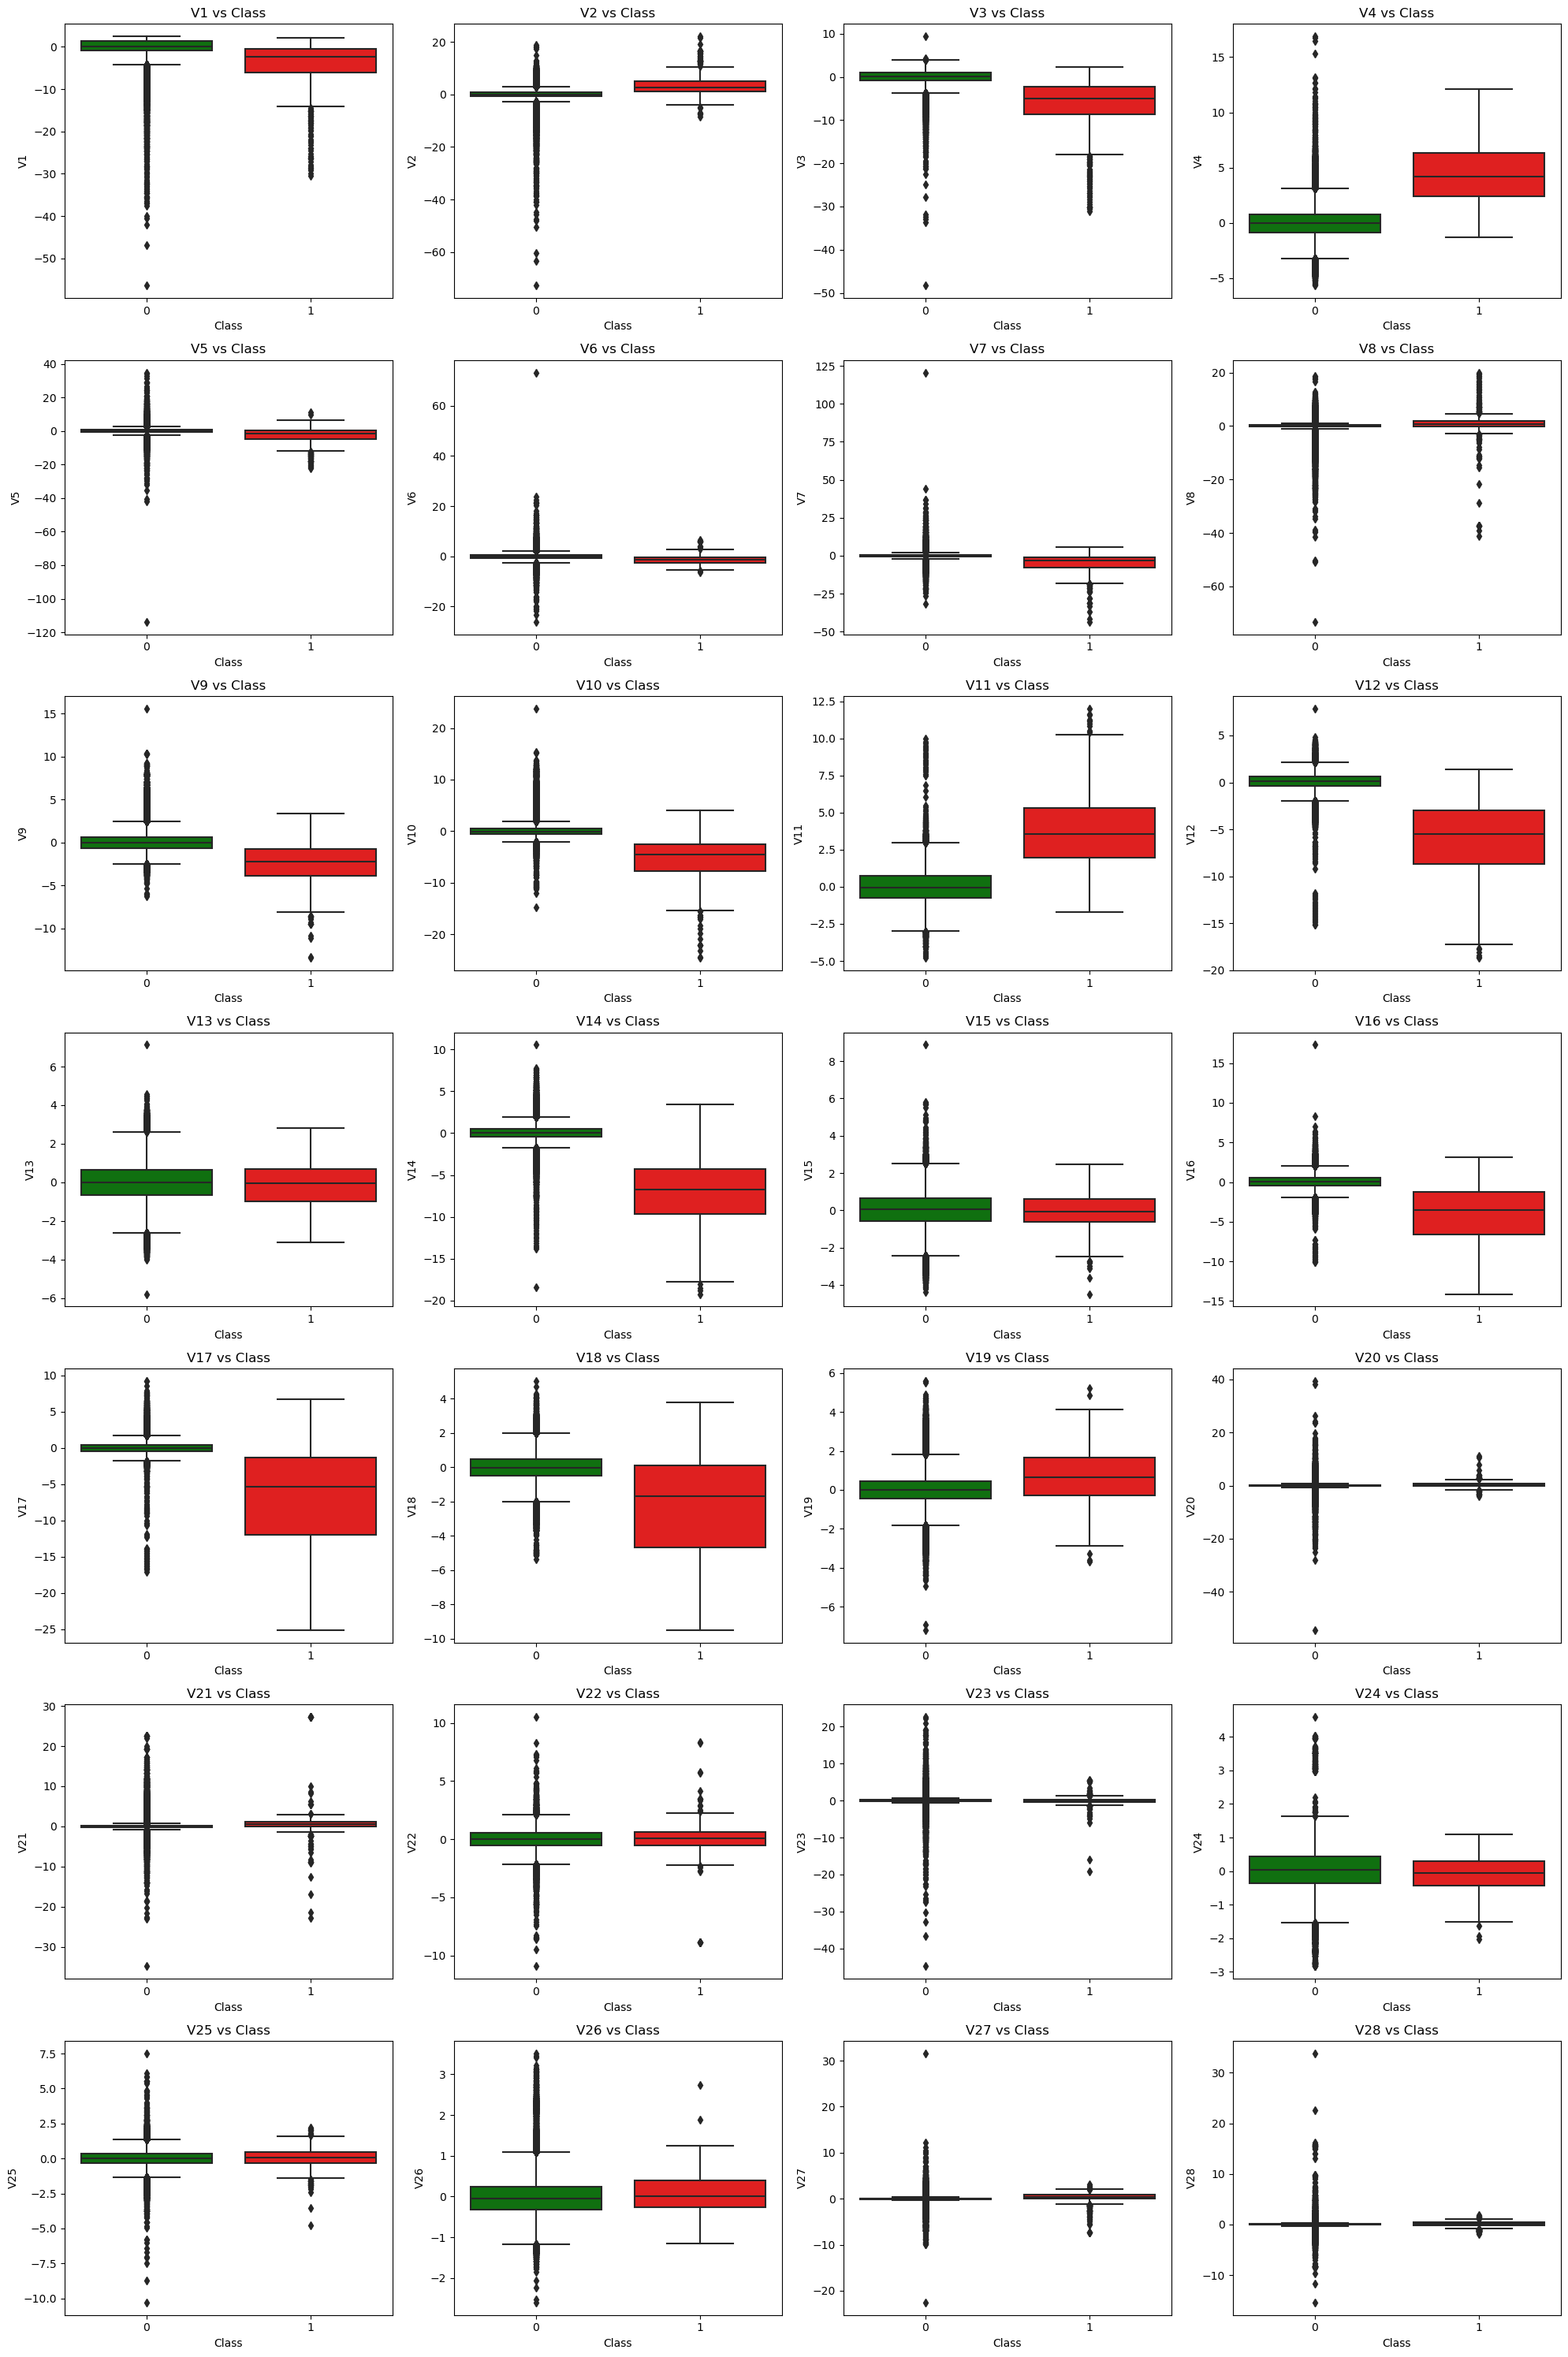

In [ ]:
plot_features(df)

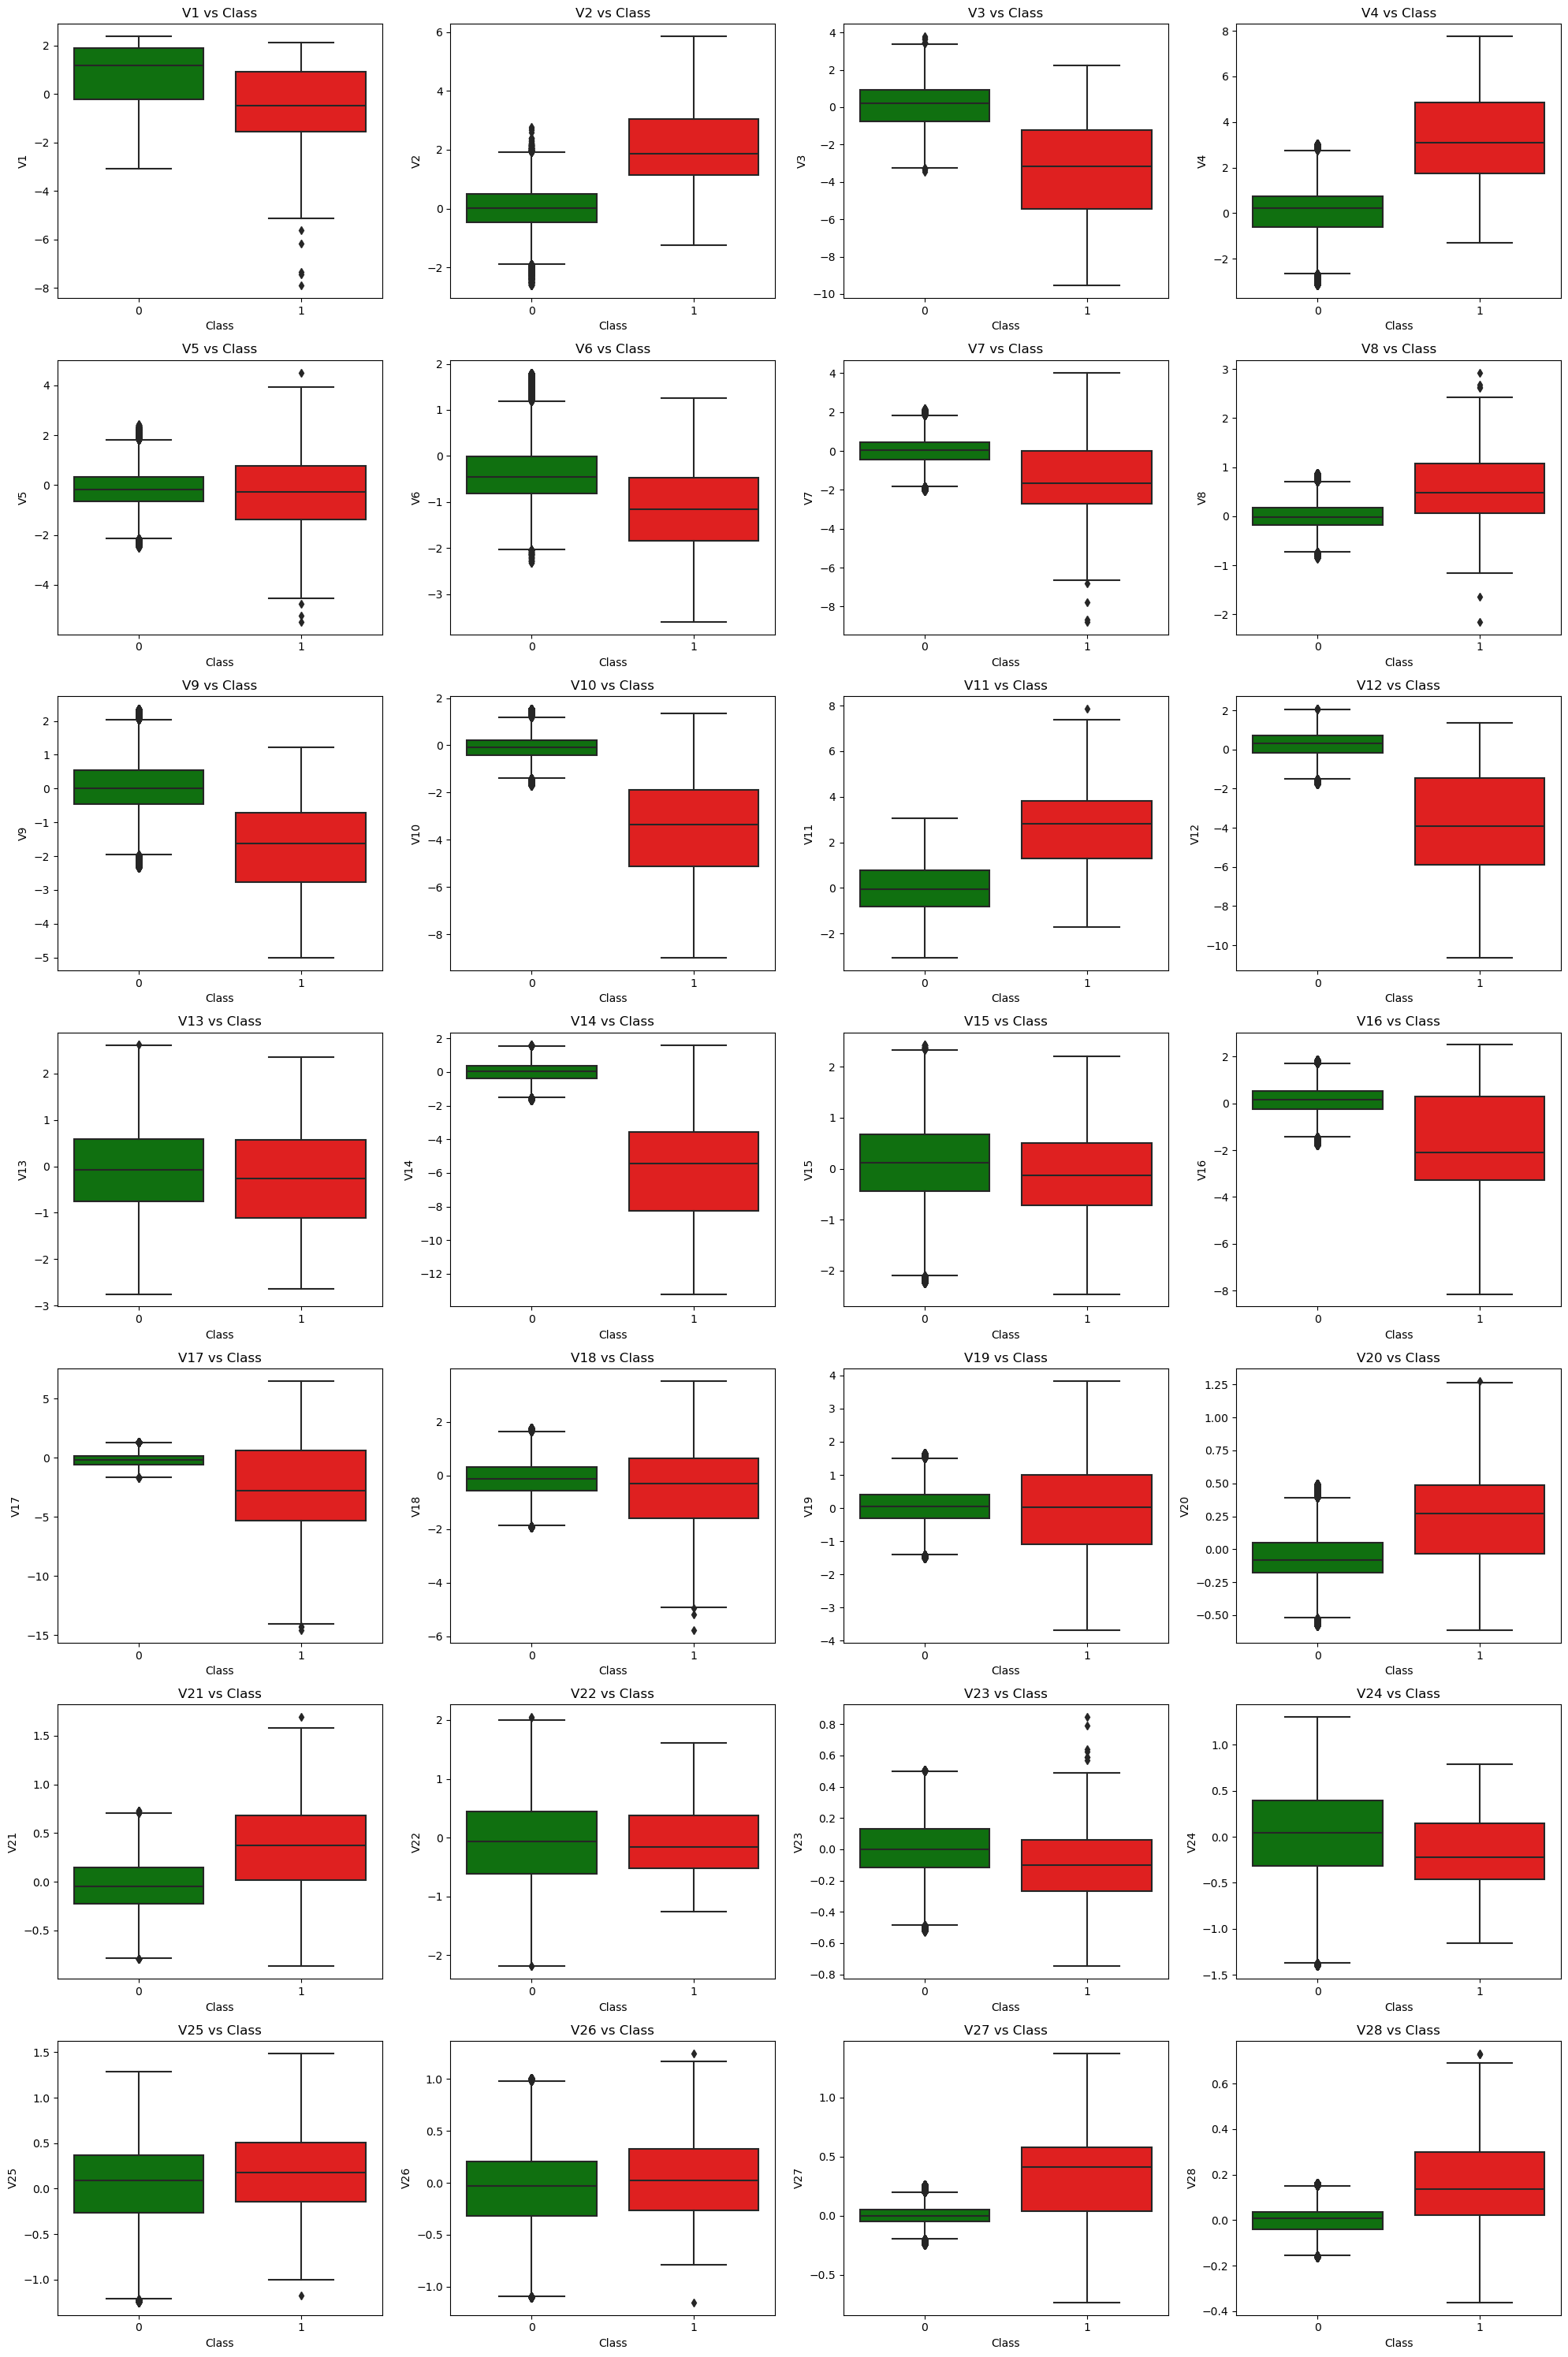

In [ ]:
plot_features(new_df_no_outliers_boxplots)

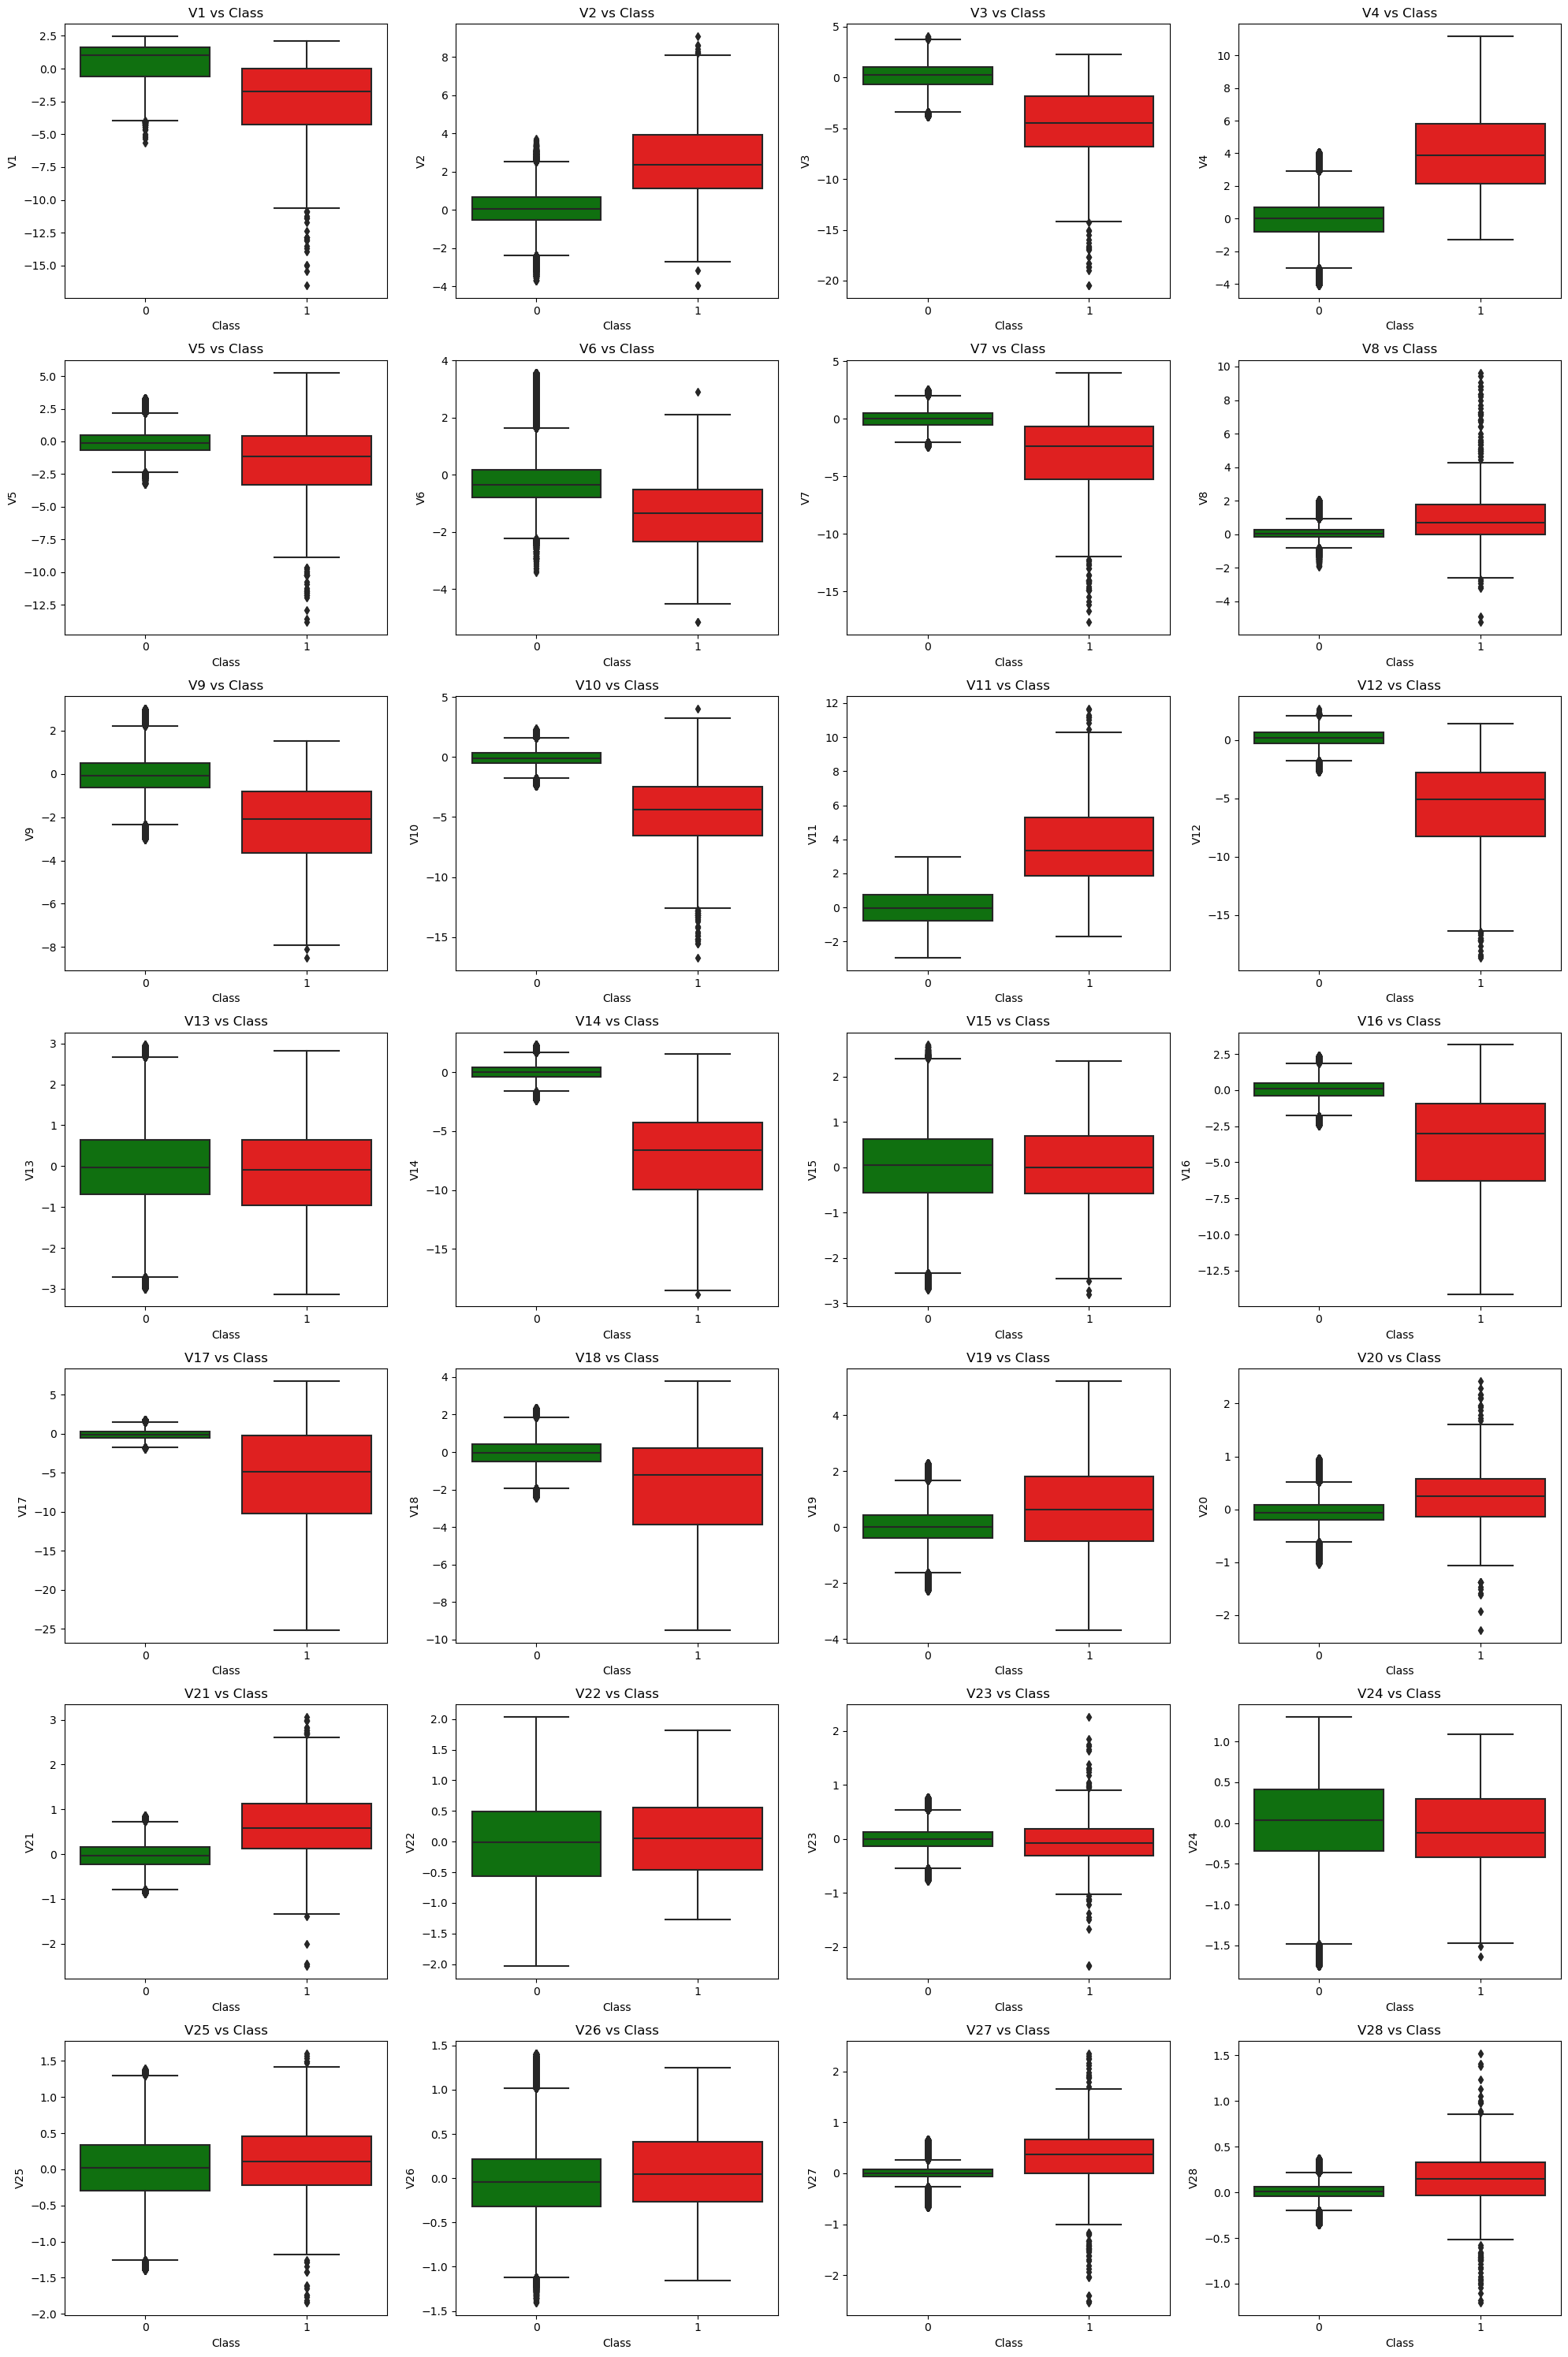

In [ ]:
plot_features(new_df_no_outliers_zscores)

The visual representation of the box plots demonstrates that both outlier detection methods effectively remove the outliers from the dataset. By eliminating these extreme values, we enhance the robustness of our credit card fraud detection model.

## Model Evaluation: Decision Tree Classifier

In this section, we evaluate the performance of a decision tree classifier on three different datasets:

In an imbalanced dataset, accuracy alone can be misleading. Let's explore why:

1. **Imbalanced Dataset:**
   - In credit card fraud detection, the majority of transactions are legitimate (non-fraudulent), while only a small fraction are fraudulent.
   - For example, if 99% of transactions are non-fraud and only 1% are fraud, a naive model that predicts everything as non-fraud would still achieve 99% accuracy.

2. **Accuracy Pitfall:**
   - Accuracy measures overall correctness (both true positives and true negatives).
   - In imbalanced datasets, it tends to favor the majority class (non-fraud).
   - High accuracy doesn't necessarily mean good fraud detection.

3. **Other Metrics:**
   - **Precision**: Measures how many of the predicted fraud cases are actually fraud (minimizing false positives).
   - **Recall (Sensitivity)**: Measures how many actual fraud cases were correctly predicted (minimizing false negatives).
   - **F1-score**: Balances precision and recall.
   - **ROC AUC**: Evaluates the model's ability to distinguish between classes.

4. **Trade-offs:**
   - Improving precision may lead to more false negatives (frauds missed).
   - Improving recall may lead to more false positives (legitimate transactions flagged as fraud).

5. **Model Selection:**
   - Choose metrics based on business requirements.
   - In fraud detection, recall (catching most frauds) is often more critical than precision (minimizing false alarms).

Remember to select the right evaluation metric based on the specific goals of your fraud detection system.

In [ ]:
def evaluate_decision_tree(X_train, y_train, X_test, y_test):
  # Create a decision tree classifier with random state 42
  lr = DecisionTreeClassifier(random_state=42)
  # Fit the classifier on the train data
  lr.fit(X_train, y_train)
  # Predict the labels for the test data
  y_pred = lr.predict(X_test)
  # Calculate the accuracy, f1-score, roc auc, precision, recall, and confusion matrix
  acc = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  roc = roc_auc_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  # Print the results
  print(f'Accuracy: {acc:.4f}')
  print(f'F1-score: {f1:.4f}')
  print(f'ROC AUC: {roc:.4f}')
  print(f'Precision: {precision:.4f}')
  print(f'Recall: {recall:.4f}')
  print(f'Confusion Matrix:\n{cm}\n')


In [ ]:
evaluate_decision_tree(X_train, y_train, X_test, y_test)

Accuracy: 0.9994
F1-score: 0.8400
ROC AUC: 0.9157
Precision: 0.8485
Recall: 0.8317
Confusion Matrix:
[[56846    15]
 [   17    84]]



In [ ]:
evaluate_decision_tree(X_train_b, y_train_b, X_test_b, y_test_b)

Accuracy: 0.9998
F1-score: 0.9474
ROC AUC: 0.9592
Precision: 0.9783
Recall: 0.9184
Confusion Matrix:
[[24095     1]
 [    4    45]]



In [ ]:
evaluate_decision_tree(X_train_z, y_train_z, X_test_z, y_test_z)

Accuracy: 0.9997
F1-score: 0.9028
ROC AUC: 0.9333
Precision: 0.9420
Recall: 0.8667
Confusion Matrix:
[[42621     4]
 [   10    65]]



## Evaluating Credit Card Fraud Detection: Beyond Accuracy

In credit card fraud detection, accuracy alone doesn't tell the whole story. Let's delve into other essential metrics and draw meaningful conclusions:

1. **Precision (Positive Predictive Value)**:
   - Precision measures how many of the predicted fraud cases are actually fraud.
   - A high precision means fewer false positives (legitimate transactions incorrectly flagged as fraud).
   - In our experiments:
     - **Box Plot Outlier Removal**: Achieved precision of 97.83%.
     - **Z-Score Outlier Removal**: Achieved precision of 94.20%.

2. **Recall (Sensitivity)**:
   - Recall measures how many actual fraud cases were correctly predicted.
   - A high recall means fewer false negatives (frauds missed).
   - In our experiments:
     - **Box Plot Outlier Removal**: Achieved recall of 91.84%.
     - **Z-Score Outlier Removal**: Achieved recall of 86.67%.

3. **F1-Score (Harmonic Mean)**:
   - Balances precision and recall.
   - F1-score considers both false positives and false negatives.
   - In our experiments:
     - **Box Plot Outlier Removal**: Achieved F1-score of 94.74%.
     - **Z-Score Outlier Removal**: Achieved F1-score of 90.28%.

4. **ROC AUC (Receiver Operating Characteristic Area Under the Curve)**:
   - Evaluates the model's ability to distinguish between classes.
   - A higher ROC AUC indicates better performance.
   - In our experiments:
     - **Box Plot Outlier Removal**: Achieved ROC AUC of 95.92%.
     - **Z-Score Outlier Removal**: Achieved ROC AUC of 93.33%.

## Conclusion:
- **Box Plot Method**: Significantly improved precision, recall, and F1-score.
- **Z-Score Method**: Also improved metrics but not as significantly.
- **Trade-offs**: Choose the method based on business requirements (e.g., prioritize recall to catch most frauds).

Remember that the right balance depends on the cost of false positives and false negatives. Keep refining your approach and safeguarding financial transactions! 🚀🔍💳